# Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize

In [2]:
df= pd.read_csv('/content/drive/MyDrive/ProjectJuly2023/train.csv', index_col = 'Id')


In [3]:
df.drop(columns=['MSSubClass', 'YearBuilt','YearRemodAdd', 'MoSold', 'YrSold', 'PoolQC', 'Fence', 'FireplaceQu', 'MiscFeature', 'Alley', 'Street', '2ndFlrSF', 'GarageCars', 'MasVnrArea', 'Utilities', 'Condition2', 'RoofMatl', 'CentralAir', '1stFlrSF'], inplace= True)

### Correlation plot


In [4]:
df

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,0,61,0,0,0,0,0,WD,Normal,208500
2,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,...,298,0,0,0,0,0,0,WD,Normal,181500
3,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,0,42,0,0,0,0,0,WD,Normal,223500
4,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,...,0,35,272,0,0,0,0,WD,Abnorml,140000
5,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,192,84,0,0,0,0,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,...,0,40,0,0,0,0,0,WD,Normal,175000
1457,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,...,349,0,0,0,0,0,0,WD,Normal,210000
1458,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,Norm,1Fam,...,0,60,0,0,0,0,2500,WD,Normal,266500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1452 non-null   object 
 17  ExterQual      1460 non-null   object 
 18  ExterCon

### pearson : standard correlation coefficient (numerically usually)

### spearman : Spearman rank (when ordering matters)


<ipython-input-6-f322eafcfa63>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


<Axes: >

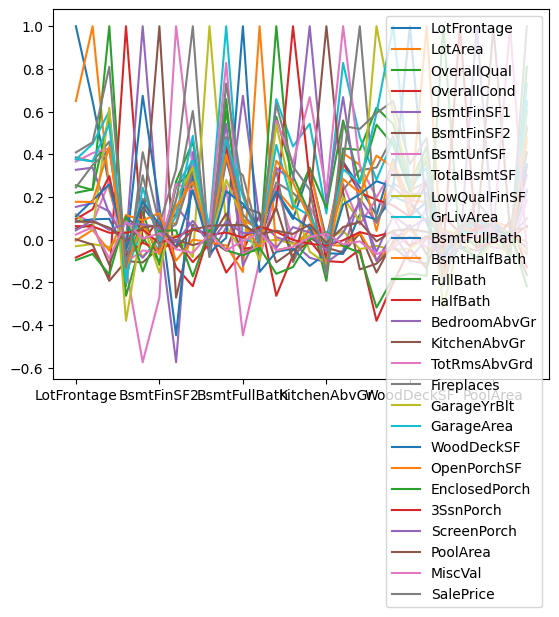

In [6]:
corr = df.corr(method='spearman')
corr.plot()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1452 non-null   object 
 17  ExterQual      1460 non-null   object 
 18  ExterCon

<Axes: >

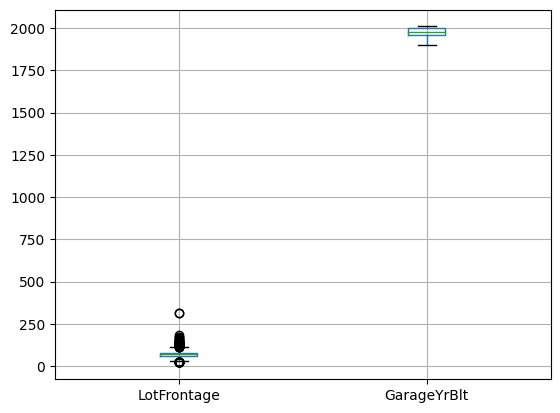

In [8]:
df.boxplot(column=['LotFrontage', 'GarageYrBlt'])

# Distribution of target values

<Axes: >

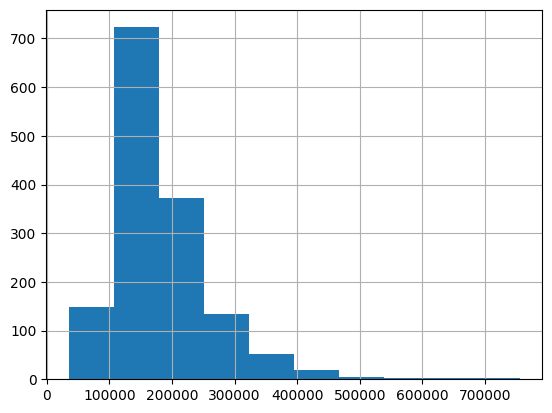

In [9]:
dfTarget = df['SalePrice']
dfTarget.hist()

# Distribution of Categorical

In [10]:
categorical = [df.select_dtypes('object').columns.to_list()][0]
df[categorical]

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Reg,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,Gable,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1457,RL,Reg,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,1Story,Gable,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1458,RL,Reg,Lvl,Inside,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


# Distribution of numerical

In [11]:
num_cat = [df.select_dtypes('int64').columns.to_list()][0]
len(num_cat)

26

<Axes: >

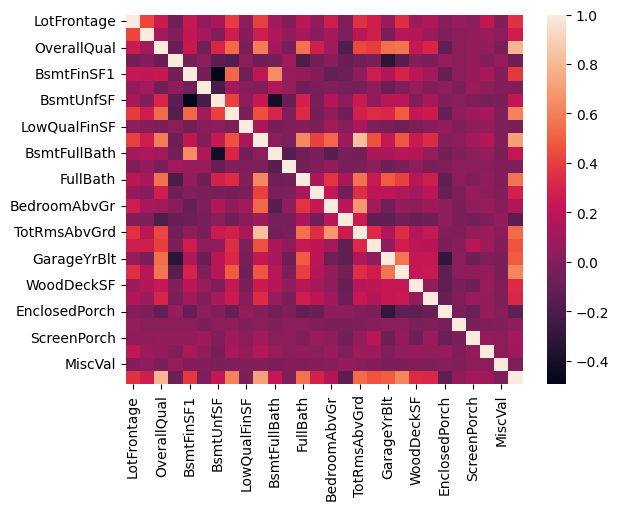

In [12]:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr)

array([[<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>],
       [<Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>],
       [<Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'OpenPorchSF'}>],
       [<Axes: title={'center

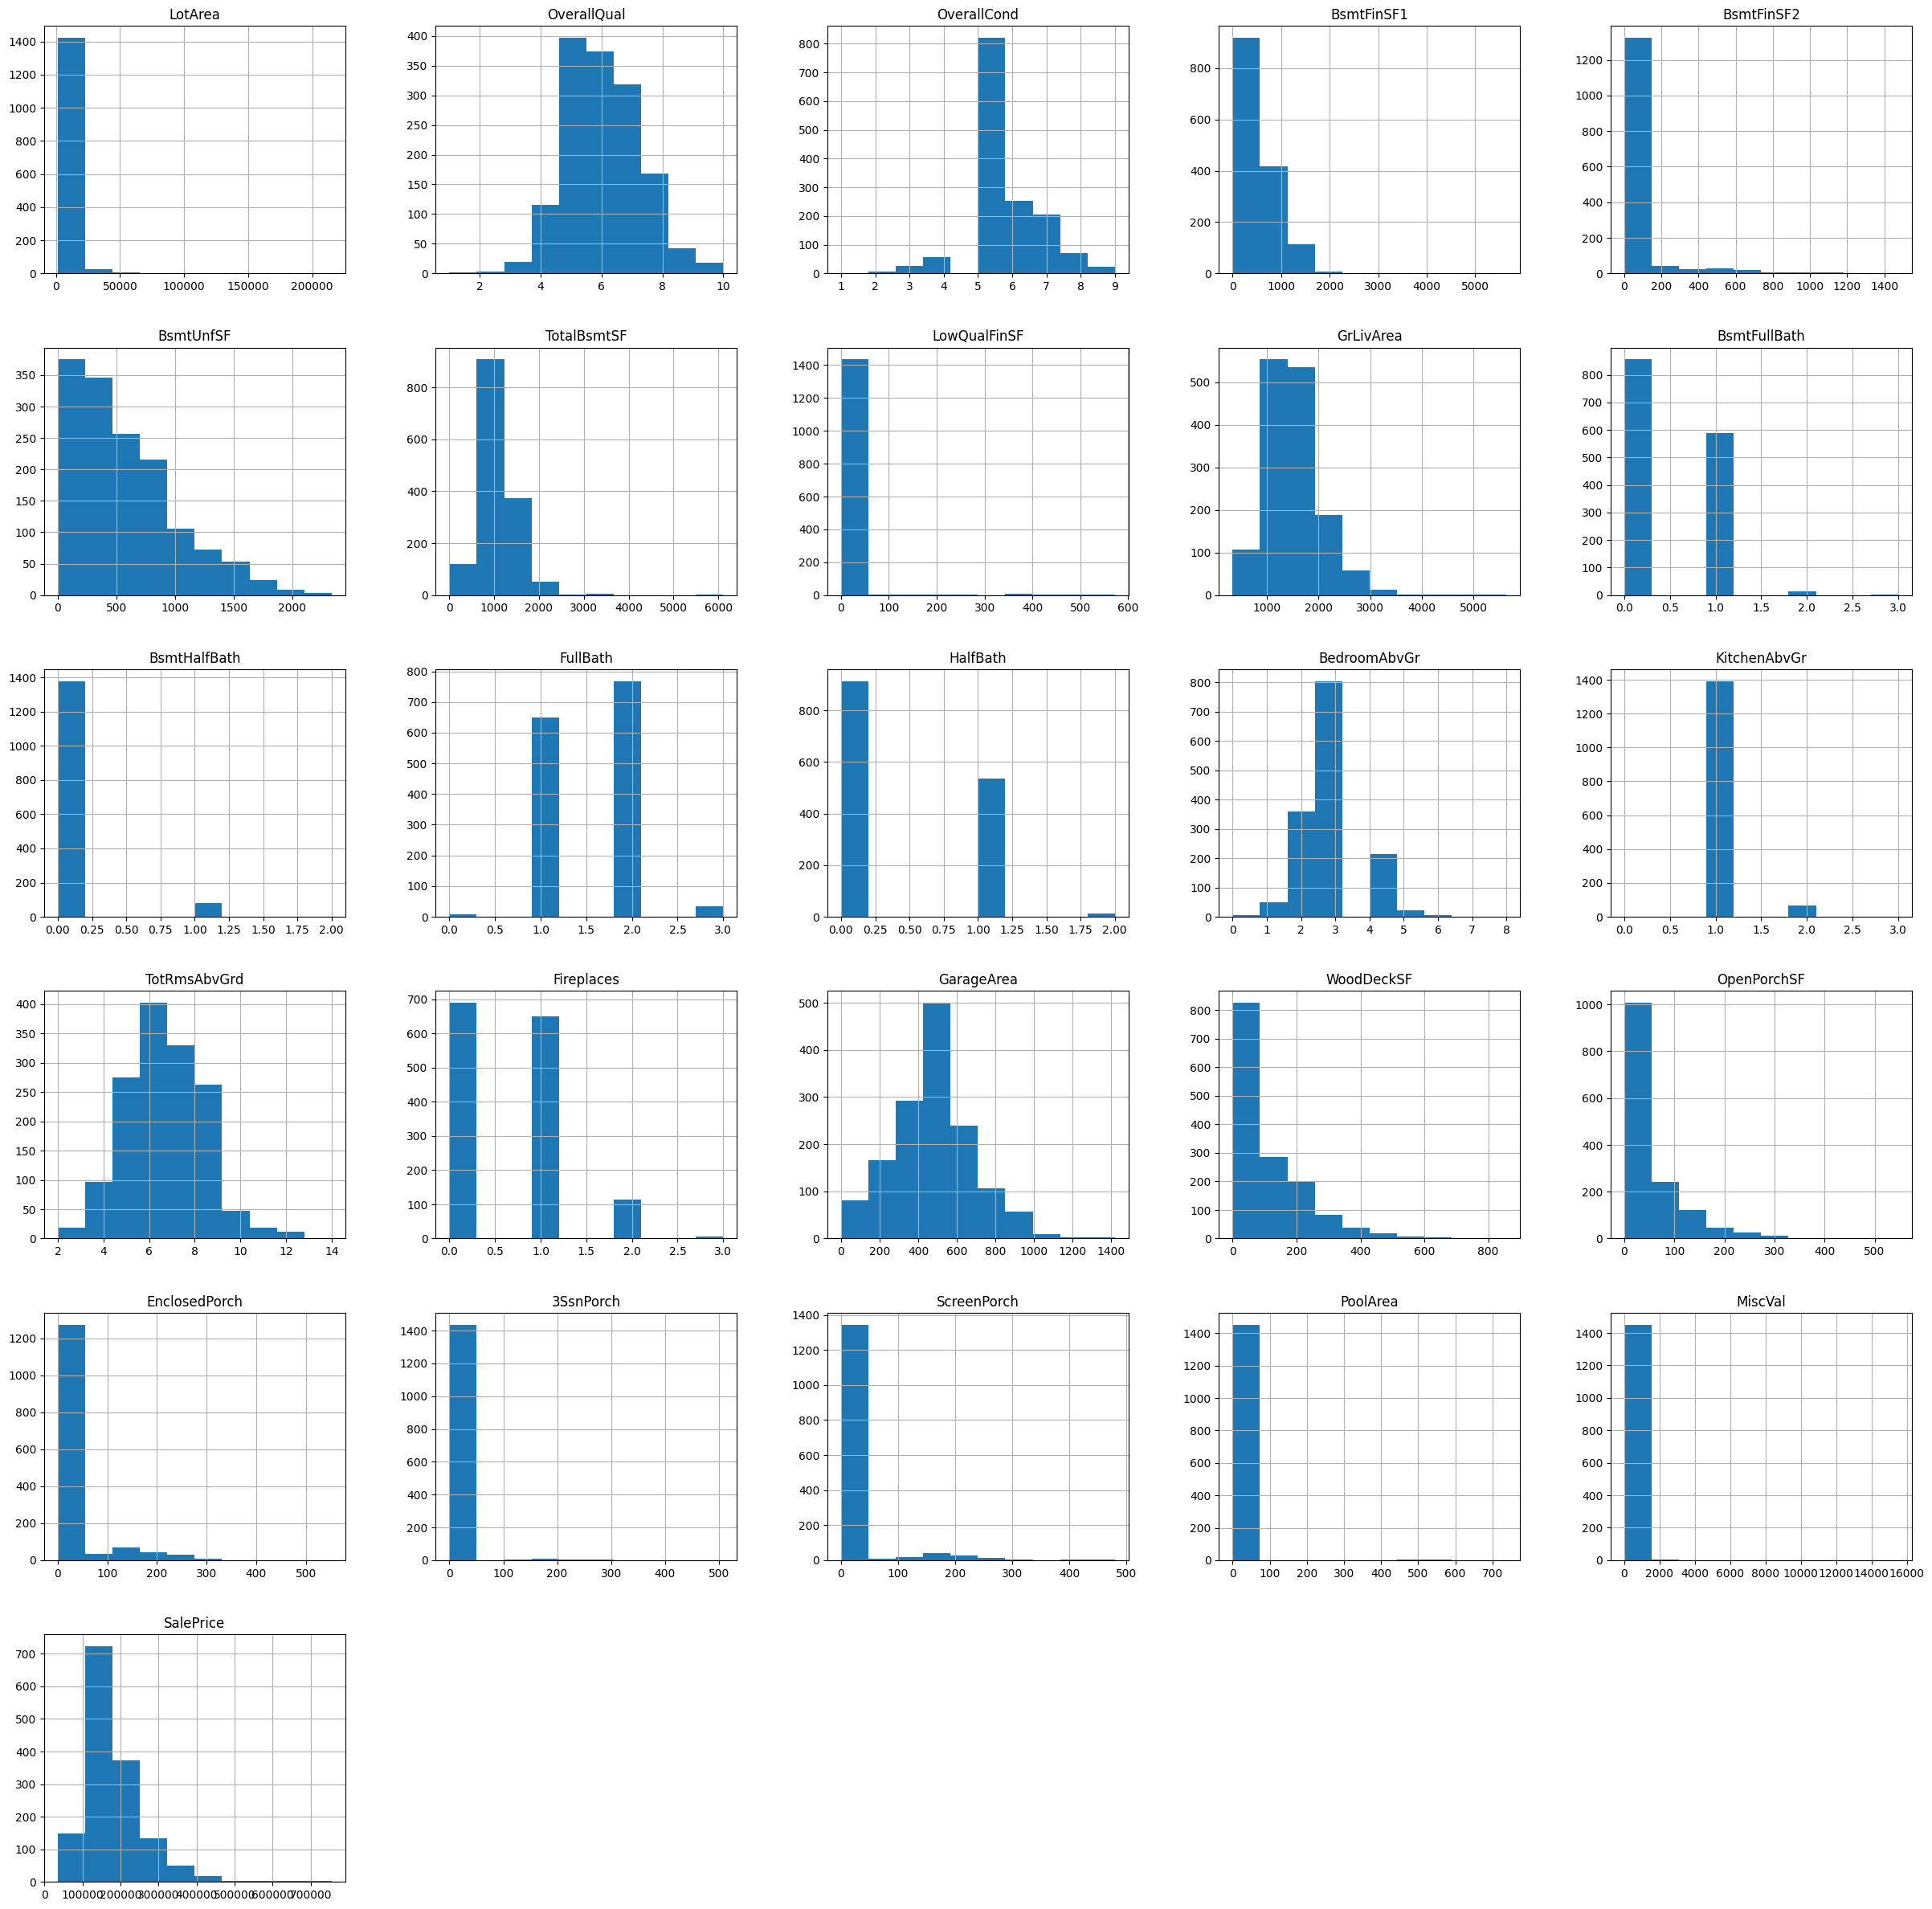

In [13]:
df[num_cat].hist(figsize=(30, 30))


In [14]:
df['PoolArea'].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [15]:
df2 = df[(np.abs(stats.zscore(df[num_cat])) < 3).all(axis=1)]

In [16]:
num_cat2 = [df2.select_dtypes('float64').columns.to_list()][0]


In [17]:
df2['LotArea']

Id
1        8450
3       11250
5       14260
7       10084
11      11200
        ...  
1453     3675
1454    17217
1455     7500
1456     7917
1457    13175
Name: LotArea, Length: 1047, dtype: int64

In [18]:
df2

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,0,61,0,0,0,0,0,WD,Normal,208500
3,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,0,42,0,0,0,0,0,WD,Normal,223500
5,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,192,84,0,0,0,0,0,WD,Normal,250000
7,RL,75.0,10084,Reg,Lvl,Inside,Gtl,Somerst,Norm,1Fam,...,255,57,0,0,0,0,0,WD,Normal,307000
11,RL,70.0,11200,Reg,Lvl,Inside,Gtl,Sawyer,Norm,1Fam,...,0,0,0,0,0,0,0,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,RM,35.0,3675,Reg,Lvl,Inside,Gtl,Edwards,Norm,TwnhsE,...,0,28,0,0,0,0,0,WD,Normal,145000
1454,RL,90.0,17217,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,...,36,56,0,0,0,0,0,WD,Abnorml,84500
1455,FV,62.0,7500,Reg,Lvl,Inside,Gtl,Somerst,Norm,1Fam,...,0,113,0,0,0,0,0,WD,Normal,185000


array([[<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>],
       [<Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>],
       [<Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'OpenPorchSF'}>],
       [<Axes: title={'center

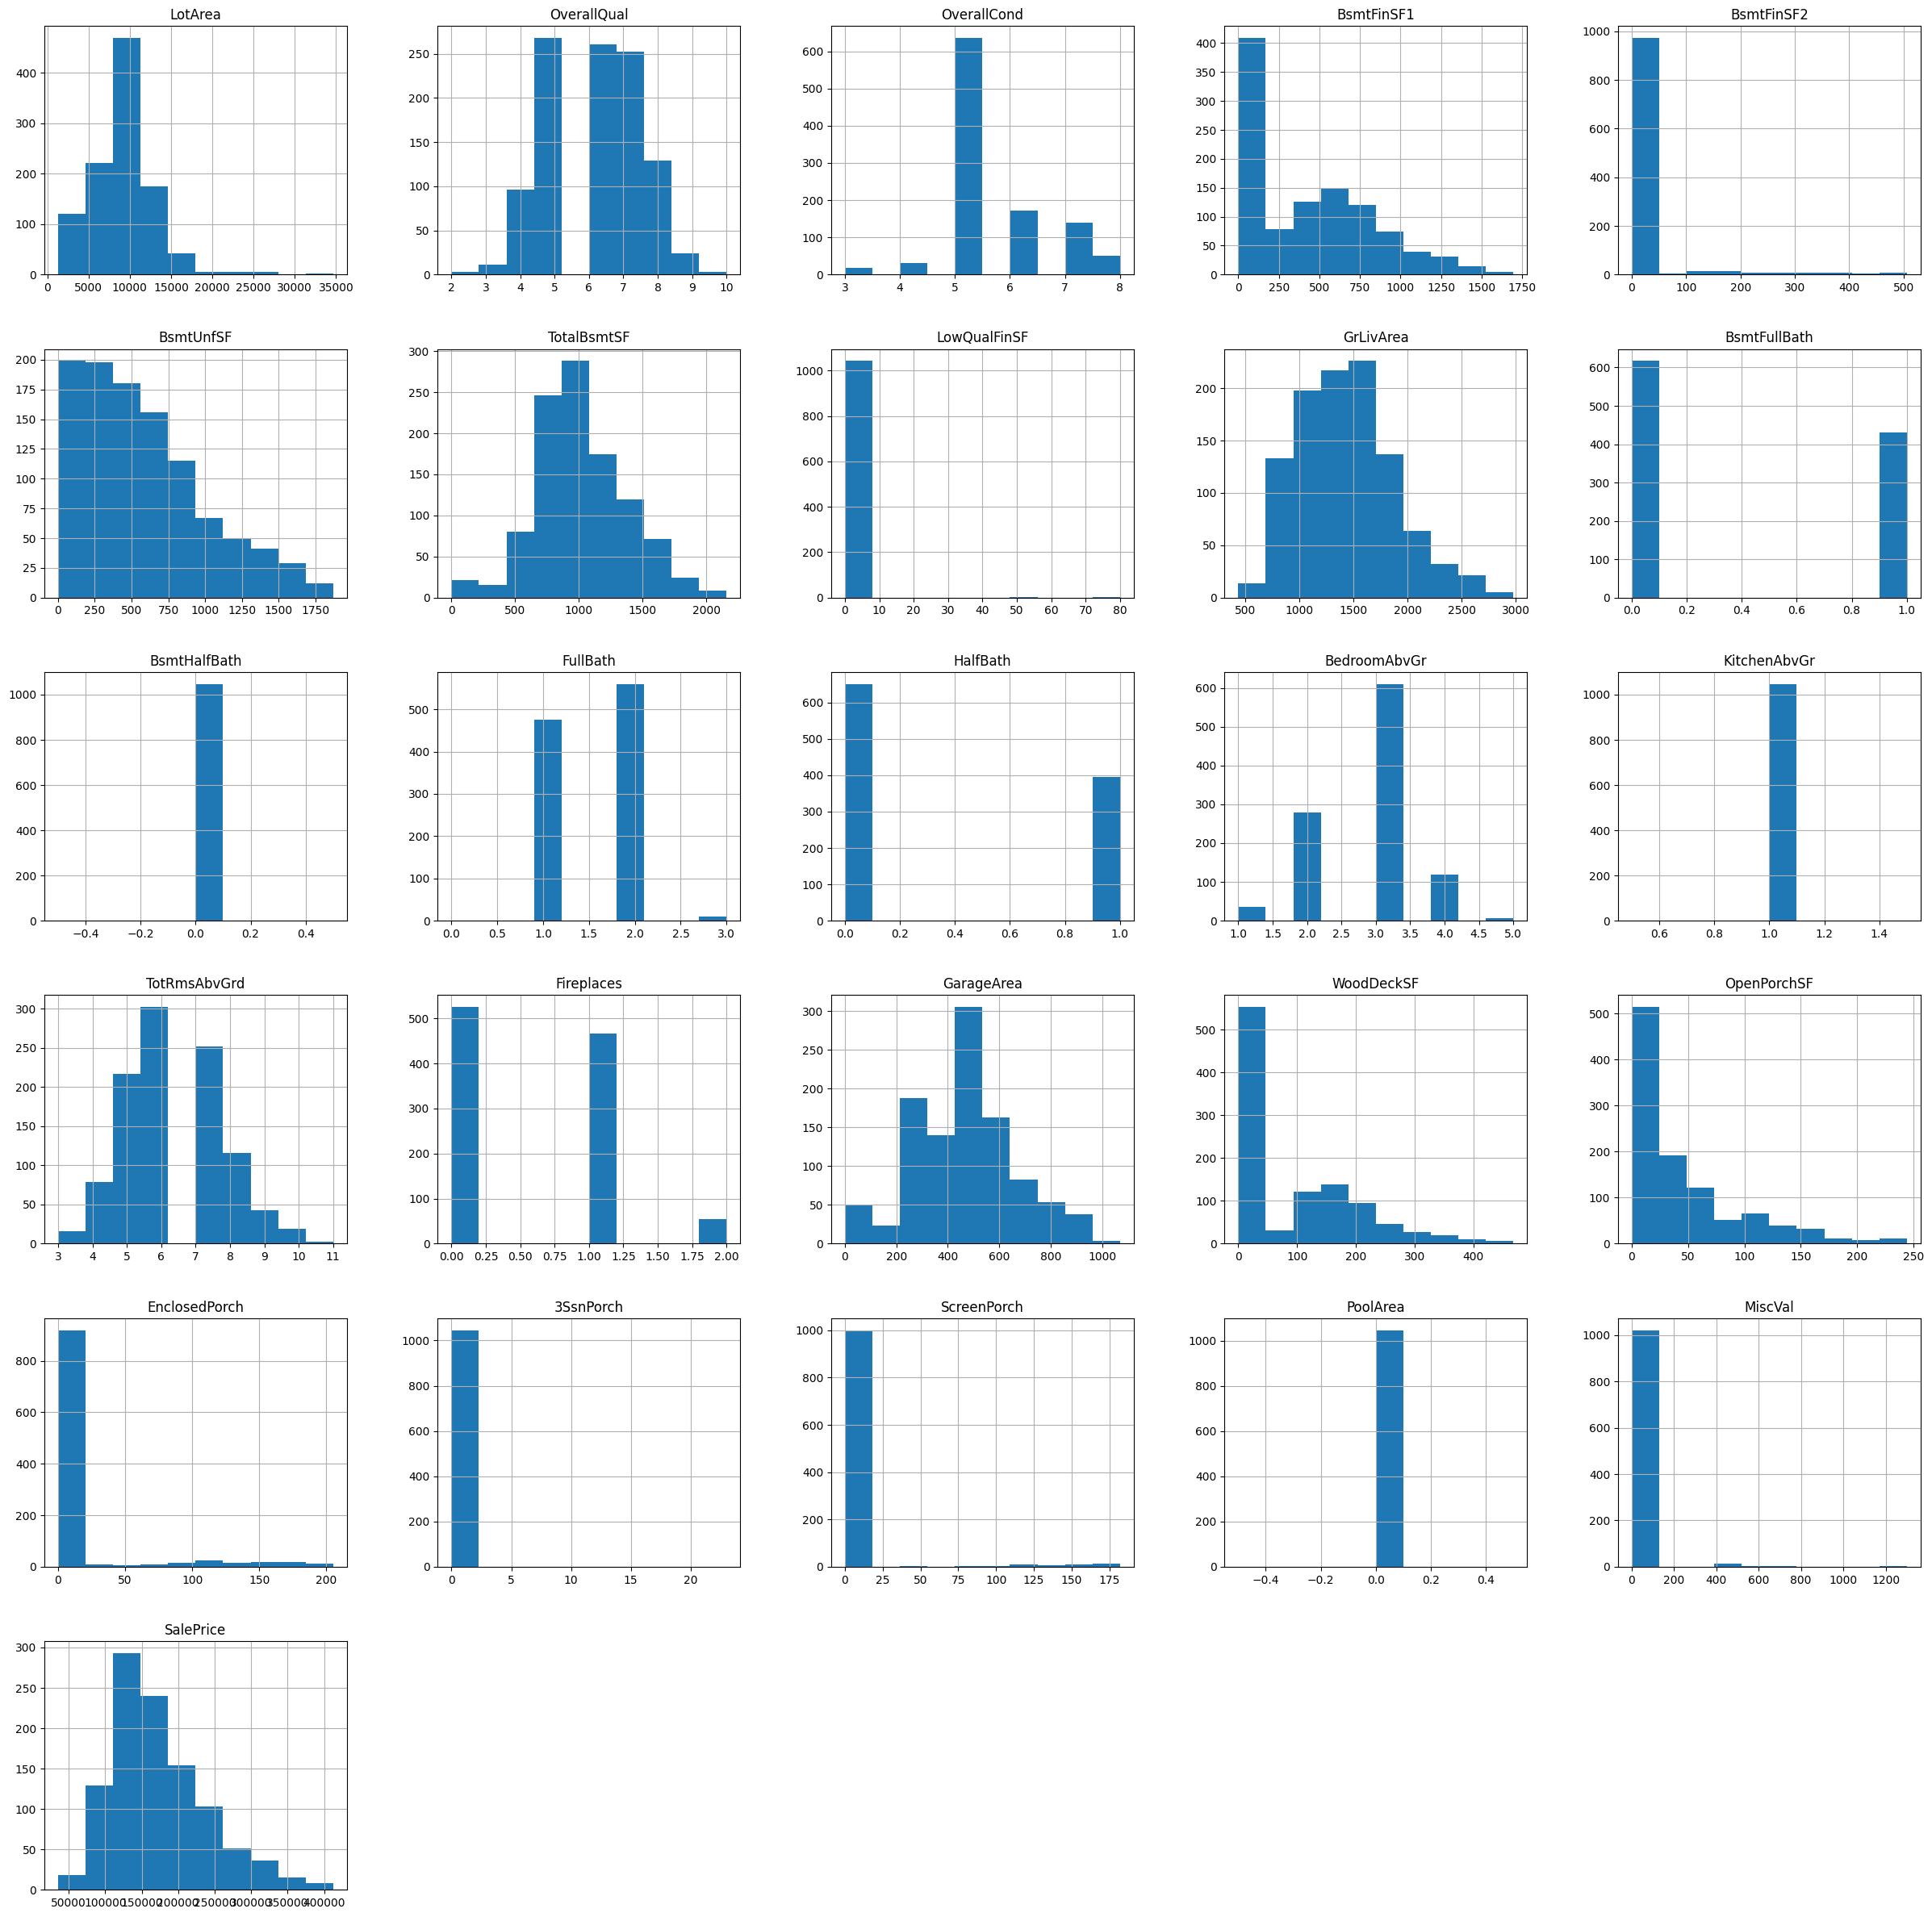

In [19]:
df2[num_cat].hist(figsize=(30, 30))

In [20]:
num_cat2 = [df2.select_dtypes('int64').columns.to_list()][0]
len(num_cat)
num_cat.remove('SalePrice')

In [21]:
autoscaler = StandardScaler()
df2[num_cat] = autoscaler.fit_transform(df2[num_cat])

<ipython-input-21-3fa9aaf68e96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[num_cat] = autoscaler.fit_transform(df2[num_cat])


In [22]:
df2

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,-0.212693,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,-0.815365,0.359090,-0.345802,-0.03092,-0.206923,0.0,-0.143509,WD,Normal,208500
3,RL,68.0,0.512711,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,-0.815365,0.001152,-0.345802,-0.03092,-0.206923,0.0,-0.143509,WD,Normal,223500
5,RL,84.0,1.292520,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,0.973164,0.792383,-0.345802,-0.03092,-0.206923,0.0,-0.143509,WD,Normal,250000
7,RL,75.0,0.210632,Reg,Lvl,Inside,Gtl,Somerst,Norm,1Fam,...,1.560025,0.283734,-0.345802,-0.03092,-0.206923,0.0,-0.143509,WD,Normal,307000
11,RL,70.0,0.499757,Reg,Lvl,Inside,Gtl,Sawyer,Norm,1Fam,...,-0.815365,-0.790080,-0.345802,-0.03092,-0.206923,0.0,-0.143509,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,RM,35.0,-1.449765,Reg,Lvl,Inside,Gtl,Edwards,Norm,TwnhsE,...,-0.815365,-0.262592,-0.345802,-0.03092,-0.206923,0.0,-0.143509,WD,Normal,145000
1454,RL,90.0,2.058598,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,...,-0.480016,0.264895,-0.345802,-0.03092,-0.206923,0.0,-0.143509,WD,Abnorml,84500
1455,FV,62.0,-0.458812,Reg,Lvl,Inside,Gtl,Somerst,Norm,1Fam,...,-0.815365,1.338710,-0.345802,-0.03092,-0.206923,0.0,-0.143509,WD,Normal,185000


array([[<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>],
       [<Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>],
       [<Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'OpenPorchSF'}>],
       [<Axes: title={'center

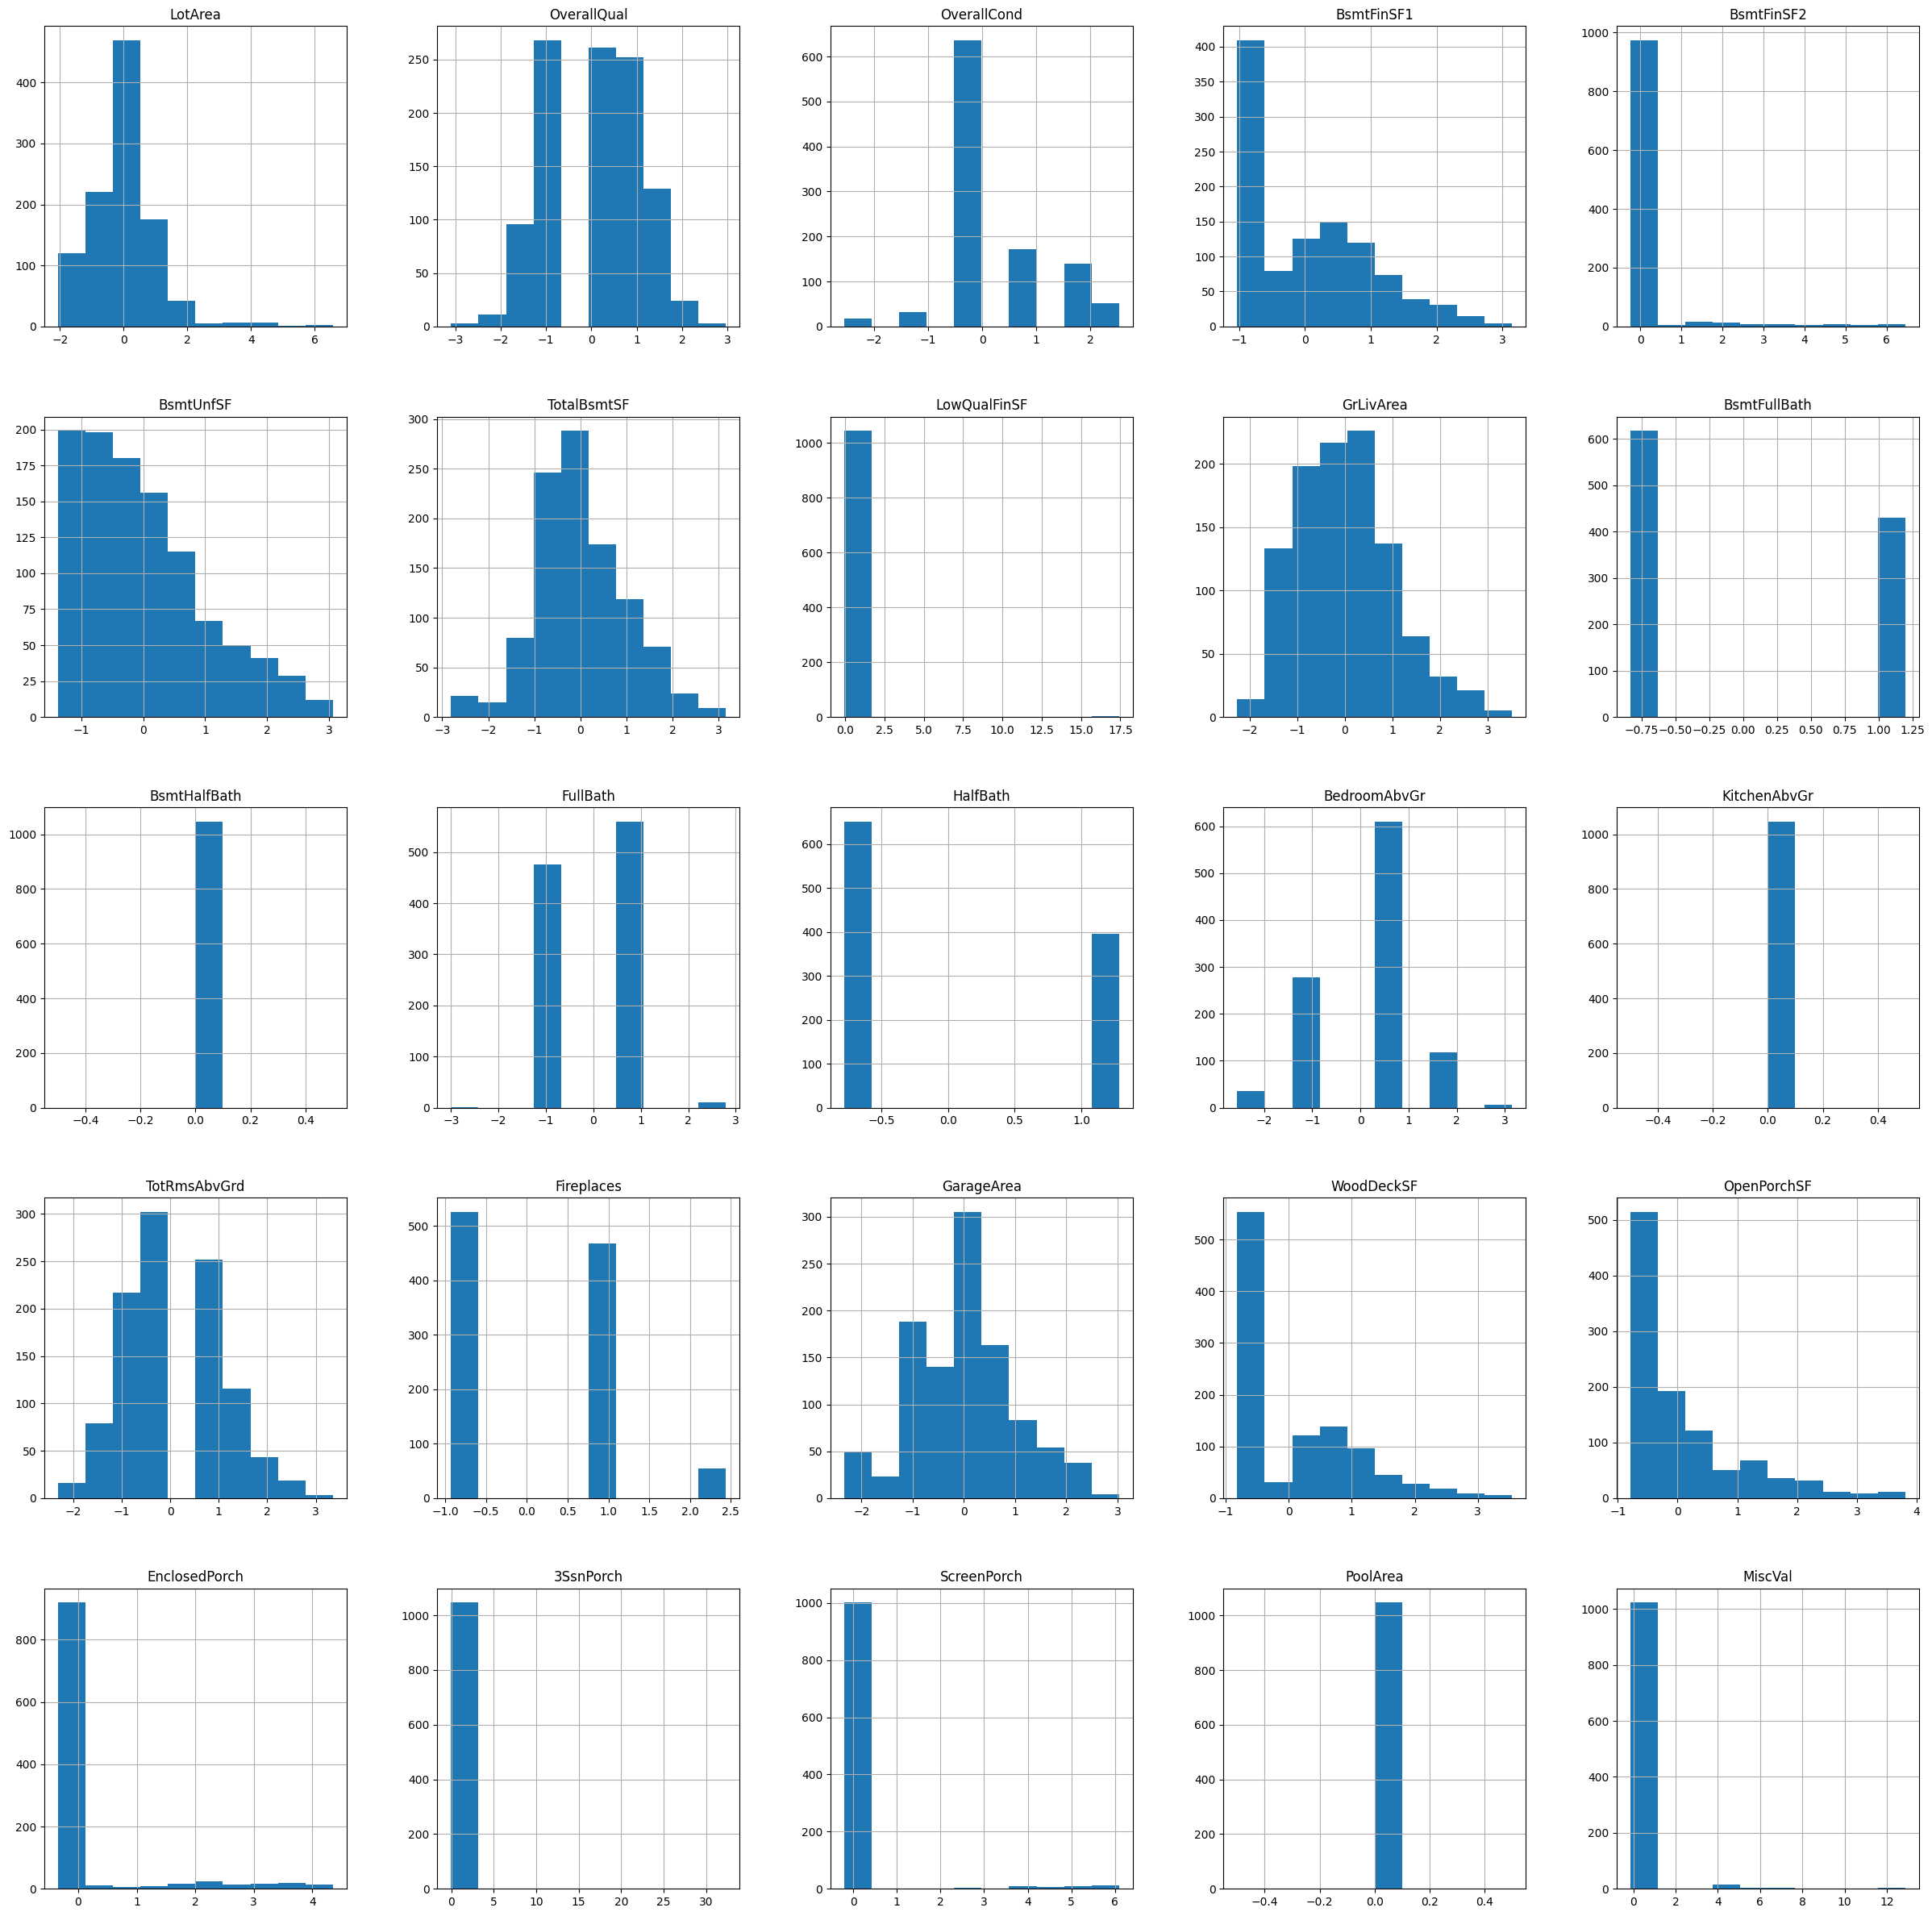

In [23]:
df2[num_cat].hist(figsize=(30, 30))

<Axes: >

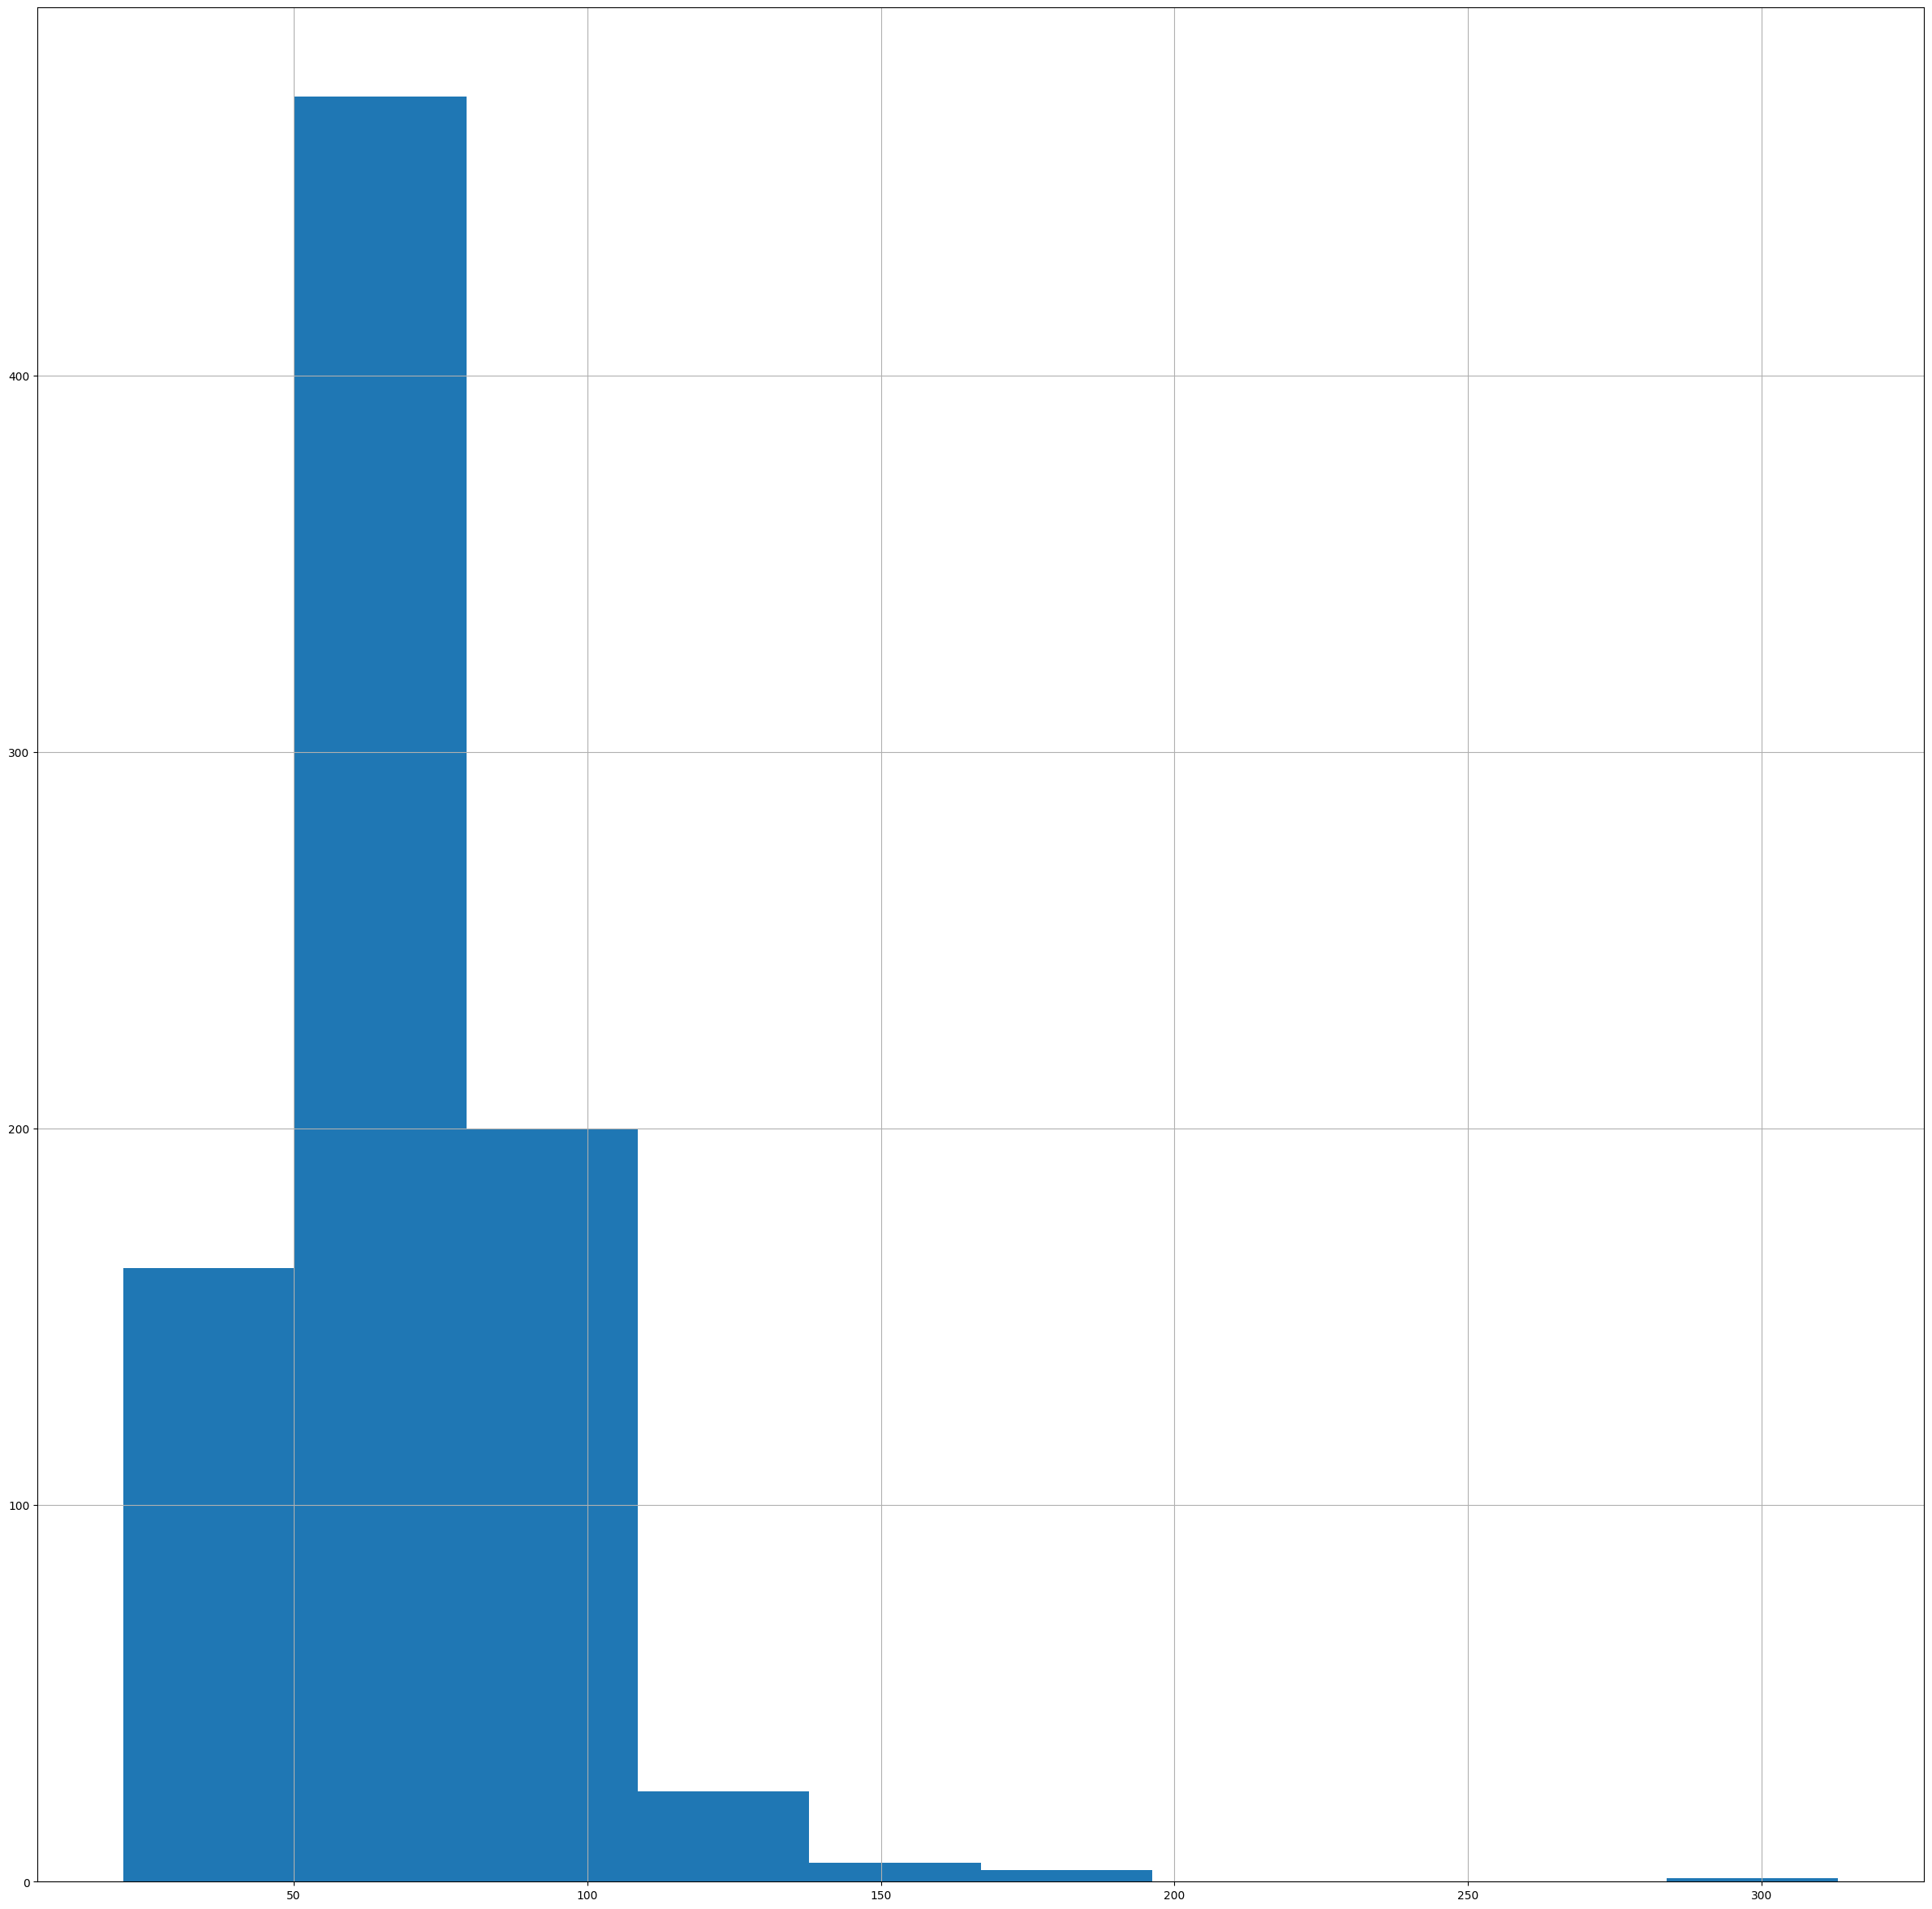

In [24]:
df2['LotFrontage'].hist(figsize=(30, 30))

In [25]:
median_value = df2['LotFrontage'].median()
median_value2 = df2['GarageYrBlt'].median()

In [26]:
df2['LotFrontage'].fillna(value=median_value, inplace=True)
df2['GarageYrBlt'].fillna(value=median_value2, inplace=True)

<ipython-input-26-1699423dc8a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LotFrontage'].fillna(value=median_value, inplace=True)
<ipython-input-26-1699423dc8a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['GarageYrBlt'].fillna(value=median_value2, inplace=True)


<Axes: >

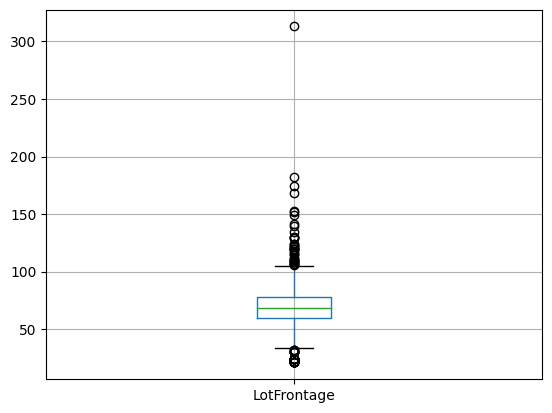

In [27]:
df2.boxplot(column=['LotFrontage'])

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 1 to 1457
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1047 non-null   object 
 1   LotFrontage    1047 non-null   float64
 2   LotArea        1047 non-null   float64
 3   LotShape       1047 non-null   object 
 4   LandContour    1047 non-null   object 
 5   LotConfig      1047 non-null   object 
 6   LandSlope      1047 non-null   object 
 7   Neighborhood   1047 non-null   object 
 8   Condition1     1047 non-null   object 
 9   BldgType       1047 non-null   object 
 10  HouseStyle     1047 non-null   object 
 11  OverallQual    1047 non-null   float64
 12  OverallCond    1047 non-null   float64
 13  RoofStyle      1047 non-null   object 
 14  Exterior1st    1047 non-null   object 
 15  Exterior2nd    1047 non-null   object 
 16  MasVnrType     1041 non-null   object 
 17  ExterQual      1047 non-null   object 
 18  ExterCon

In [29]:
df2

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,-0.212693,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,-0.815365,0.359090,-0.345802,-0.03092,-0.206923,0.0,-0.143509,WD,Normal,208500
3,RL,68.0,0.512711,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,-0.815365,0.001152,-0.345802,-0.03092,-0.206923,0.0,-0.143509,WD,Normal,223500
5,RL,84.0,1.292520,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,0.973164,0.792383,-0.345802,-0.03092,-0.206923,0.0,-0.143509,WD,Normal,250000
7,RL,75.0,0.210632,Reg,Lvl,Inside,Gtl,Somerst,Norm,1Fam,...,1.560025,0.283734,-0.345802,-0.03092,-0.206923,0.0,-0.143509,WD,Normal,307000
11,RL,70.0,0.499757,Reg,Lvl,Inside,Gtl,Sawyer,Norm,1Fam,...,-0.815365,-0.790080,-0.345802,-0.03092,-0.206923,0.0,-0.143509,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,RM,35.0,-1.449765,Reg,Lvl,Inside,Gtl,Edwards,Norm,TwnhsE,...,-0.815365,-0.262592,-0.345802,-0.03092,-0.206923,0.0,-0.143509,WD,Normal,145000
1454,RL,90.0,2.058598,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,...,-0.480016,0.264895,-0.345802,-0.03092,-0.206923,0.0,-0.143509,WD,Abnorml,84500
1455,FV,62.0,-0.458812,Reg,Lvl,Inside,Gtl,Somerst,Norm,1Fam,...,-0.815365,1.338710,-0.345802,-0.03092,-0.206923,0.0,-0.143509,WD,Normal,185000


In [30]:
df2['MSZoning'].value_counts()

RL         819
RM         150
FV          63
RH           9
C (all)      6
Name: MSZoning, dtype: int64

# Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

# List of columns to be label encoded
columns_to_encode = [
    'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
    'Condition1', 'RoofStyle', 'HouseStyle', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'Exterior1st', 'Exterior2nd',
    'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC',
    'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
    'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition',
    'BldgType'
]

# Create a LabelEncoder
labelencoder = LabelEncoder()

# Loop through columns and apply label encoding
for column in columns_to_encode:
    df2[column] = labelencoder.fit_transform(df2[column])

# Display value counts for 'LotShape' and 'LotConfig' as examples
print(df2['LotShape'].value_counts())
print(df2['LotConfig'].value_counts())

3    678
0    342
1     20
2      7
Name: LotShape, dtype: int64
4    772
0    178
1     59
2     34
3      4
Name: LotConfig, dtype: int64


<ipython-input-31-cc32e509f682>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[column] = labelencoder.fit_transform(df2[column])
<ipython-input-31-cc32e509f682>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[column] = labelencoder.fit_transform(df2[column])
<ipython-input-31-cc32e509f682>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [32]:
df2['SaleCondition'].value_counts()

4    869
5     94
0     68
3     12
1      2
2      2
Name: SaleCondition, dtype: int64

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 1 to 1457
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1047 non-null   int64  
 1   LotFrontage    1047 non-null   float64
 2   LotArea        1047 non-null   float64
 3   LotShape       1047 non-null   int64  
 4   LandContour    1047 non-null   int64  
 5   LotConfig      1047 non-null   int64  
 6   LandSlope      1047 non-null   int64  
 7   Neighborhood   1047 non-null   int64  
 8   Condition1     1047 non-null   int64  
 9   BldgType       1047 non-null   int64  
 10  HouseStyle     1047 non-null   int64  
 11  OverallQual    1047 non-null   float64
 12  OverallCond    1047 non-null   float64
 13  RoofStyle      1047 non-null   int64  
 14  Exterior1st    1047 non-null   int64  
 15  Exterior2nd    1047 non-null   int64  
 16  MasVnrType     1047 non-null   int64  
 17  ExterQual      1047 non-null   int64  
 18  ExterCon

In [34]:
df2

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,3,65.0,-0.212693,3,3,4,0,5,2,0,...,-0.815365,0.359090,-0.345802,-0.03092,-0.206923,0.0,-0.143509,8,4,208500
3,3,68.0,0.512711,0,3,4,0,5,2,0,...,-0.815365,0.001152,-0.345802,-0.03092,-0.206923,0.0,-0.143509,8,4,223500
5,3,84.0,1.292520,0,3,2,0,15,2,0,...,0.973164,0.792383,-0.345802,-0.03092,-0.206923,0.0,-0.143509,8,4,250000
7,3,75.0,0.210632,3,3,4,0,21,2,0,...,1.560025,0.283734,-0.345802,-0.03092,-0.206923,0.0,-0.143509,8,4,307000
11,3,70.0,0.499757,3,3,4,0,19,2,0,...,-0.815365,-0.790080,-0.345802,-0.03092,-0.206923,0.0,-0.143509,8,4,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,4,35.0,-1.449765,3,3,4,0,7,2,4,...,-0.815365,-0.262592,-0.345802,-0.03092,-0.206923,0.0,-0.143509,8,4,145000
1454,3,90.0,2.058598,3,3,4,0,11,2,0,...,-0.480016,0.264895,-0.345802,-0.03092,-0.206923,0.0,-0.143509,8,0,84500
1455,1,62.0,-0.458812,3,3,4,0,21,2,0,...,-0.815365,1.338710,-0.345802,-0.03092,-0.206923,0.0,-0.143509,8,4,185000


# Machine learning
## Model fitting and predicting

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [37]:
y = df2['SalePrice']
X = df2.drop(columns=['SalePrice'], axis=1)

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, train_size=0.75)


In [39]:
model = LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_val)

In [42]:
linear_mse = mean_squared_error(y_val, y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_val, y_pred)
print(linear_mse, linear_rmse, linear_r2)

518529732.2127105 22771.24792831325 0.8780891430701873


In [43]:
X_val

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1256,4,52.0,-0.785244,3,3,4,0,3,2,0,...,2,-0.815365,-0.790080,-0.345802,-0.03092,3.946743,0.0,-0.143509,8,4
1037,3,89.0,0.939663,0,1,4,0,23,2,0,...,2,1.308513,-0.790080,-0.345802,-0.03092,-0.206923,0.0,-0.143509,8,4
1088,1,85.0,0.337578,3,3,4,0,21,2,0,...,2,0.675076,0.151862,-0.345802,-0.03092,-0.206923,0.0,-0.143509,8,4
1116,3,93.0,0.729037,3,3,4,0,16,2,0,...,2,-0.815365,-0.790080,-0.345802,-0.03092,-0.206923,0.0,-0.143509,6,5
1243,3,85.0,0.350791,3,3,4,0,14,2,0,...,2,-0.815365,1.470582,-0.345802,-0.03092,-0.206923,0.0,-0.143509,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,3,60.0,-0.280052,3,3,4,0,7,2,0,...,2,-0.815365,-0.111882,-0.345802,-0.03092,-0.206923,0.0,-0.143509,8,4
156,3,60.0,0.085241,3,3,0,0,7,0,0,...,0,-0.815365,-0.639369,2.586372,-0.03092,-0.206923,0.0,-0.143509,8,4
918,3,68.0,2.038650,3,3,4,0,7,2,0,...,2,-0.815365,-0.790080,-0.345802,-0.03092,-0.206923,0.0,-0.143509,8,4


In [44]:
X_val.iloc[:, 0]

Id
1256    4
1037    3
1088    1
1116    3
1243    3
       ..
1315    3
156     3
918     3
60      3
1333    3
Name: MSZoning, Length: 262, dtype: int64

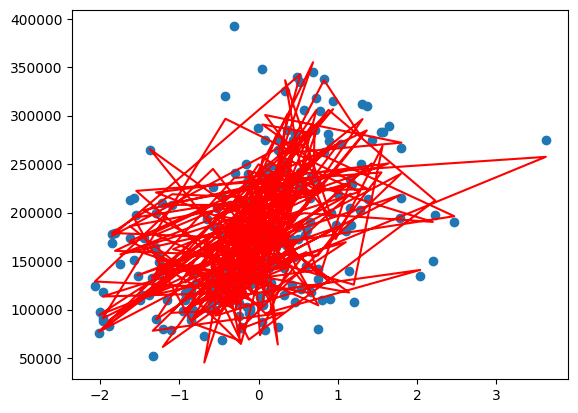

In [45]:
import matplotlib.pyplot as plt
plt.scatter(X_val.iloc[:, 2].values.reshape(-1,1), y_val)
plt.plot(X_val.iloc[:, 2].values.reshape(-1,1), y_pred, color='red')
plt.show()

In [46]:
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

In [47]:
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a Linear Regression model
linear_model = LinearRegression()

# Create Random Forest and Gradient Boosting models
random_forest = RandomForestRegressor()
gradient_boost = GradientBoostingRegressor()

# Create an XGBoost model
xgb_model = xgb.XGBRegressor()

# Create a BaggingRegressor with Decision Trees as the base model
base_decision_tree = DecisionTreeRegressor()
bagged_decision_trees = BaggingRegressor(base_estimator=base_decision_tree, random_state=42)

# Define the parameter grid for Linear Regression
linear_param_grid = {
    'fit_intercept': [True, False]
}

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]
}

# Define the parameter grid for Random Forest
random_forest_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'max_features' : ['sqrt', 'log2', None],
    'criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

# Define the parameter grid for Gradient Boosting
gradient_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'criterion' : ['friedman_mse', 'squared_error'],
    'alpha' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

# Define the parameter grid for BaggingRegressor with Decision Trees
bagged_param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'base_estimator__max_depth': [None, 10, 20, 30, 40, 50],
    'base_estimator__min_samples_split': [2, 5, 10, 20, 25],
    'base_estimator__min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
}

# Create GridSearchCV objects for Linear Regression and XGBoost
linear_grid_search = RandomizedSearchCV(linear_model, linear_param_grid, cv=10, n_jobs=-1, verbose=5)
xgb_grid_search = RandomizedSearchCV(xgb_model, xgb_param_grid, cv=10, n_jobs=-1, verbose=5)
random_forest_grid_search = RandomizedSearchCV(random_forest, random_forest_param_grid, cv=10, n_jobs=-1, verbose=5)
gradient_boost_grid_search = RandomizedSearchCV(gradient_boost, gradient_param_grid, cv=10, n_jobs=-1, verbose=5)
bagged_grid_search = RandomizedSearchCV(bagged_decision_trees, bagged_param_grid, cv=10, n_jobs=-1, verbose=5)

# Fit the grid searches to the data
linear_grid_search.fit(X_train, y_train)
xgb_grid_search.fit(X_train, y_train)
random_forest_grid_search.fit(X_train, y_train)
gradient_boost_grid_search.fit(X_train, y_train)
bagged_grid_search.fit(X_train, y_train)

# Get the best models from each grid search
best_linear_model = linear_grid_search.best_estimator_
best_xgb_model = xgb_grid_search.best_estimator_
best_random_forest_model = random_forest_grid_search.best_estimator_
best_gradient_boost_model = gradient_boost_grid_search.best_estimator_
best_bagged_decision_trees = bagged_grid_search.best_estimator_

# Predict sale prices for validation data using the best models
linear_val_predictions = best_linear_model.predict(X_val)
xgb_val_predictions = best_xgb_model.predict(X_val)
random_forest_val_predictions = best_random_forest_model.predict(X_val)
gradient_boost_val_predictions = best_gradient_boost_model.predict(X_val)
bagged_val_predictions = best_bagged_decision_trees.predict(X_val)

# Calculate evaluation metrics for Linear Regression
linear_mae = mean_absolute_error(y_val, linear_val_predictions)
linear_mse = mean_squared_error(y_val, linear_val_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_val, linear_val_predictions)

# Calculate evaluation metrics for XGBoost
xgb_mae = mean_absolute_error(y_val, xgb_val_predictions)
xgb_mse = mean_squared_error(y_val, xgb_val_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_val, xgb_val_predictions)

# Calculate evaluation metrics for Random Forest
random_forest_mae = mean_absolute_error(y_val, random_forest_val_predictions)
random_forest_mse = mean_squared_error(y_val, random_forest_val_predictions)
random_forest_rmse = np.sqrt(random_forest_mse)
random_forest_r2 = r2_score(y_val, random_forest_val_predictions)

# Calculate evaluation metrics for Gradient Boosting
gradient_boost_mae = mean_absolute_error(y_val, gradient_boost_val_predictions)
gradient_boost_mse = mean_squared_error(y_val, gradient_boost_val_predictions)
gradient_boost_rmse = np.sqrt(gradient_boost_mse)
gradient_boost_r2 = r2_score(y_val, gradient_boost_val_predictions)

# Calculate evaluation metrics for Bagged Decision Trees
bagged_mae = mean_absolute_error(y_val, bagged_val_predictions)
bagged_mse = mean_squared_error(y_val, bagged_val_predictions)
bagged_rmse = np.sqrt(bagged_mse)
bagged_r2 = r2_score(y_val, bagged_val_predictions)

# Print evaluation metrics for each model
print('Linear Regression Evaluation:')
print('Mean Absolute Error:', linear_mae)
print('Mean Squared Error:', linear_mse)
print('Root Mean Squared Error:', linear_rmse)
print('R-squared Score:', linear_r2)

print('\nXGBoost Evaluation:')
print('Mean Absolute Error:', xgb_mae)
print('Mean Squared Error:', xgb_mse)
print('Root Mean Squared Error:', xgb_rmse)
print('R-squared Score:', xgb_r2)

print('\nRandom Forest Evaluation:')
print('Mean Absolute Error:', random_forest_mae)
print('Mean Squared Error:', random_forest_mse)
print('Root Mean Squared Error:', random_forest_rmse)
print('R-squared Score:', random_forest_r2)

print('\nGradient Boosting Evaluation:')
print('Mean Absolute Error:', gradient_boost_mae)
print('Mean Squared Error:', gradient_boost_mse)
print('Root Mean Squared Error:', gradient_boost_rmse)
print('R-squared Score:', gradient_boost_r2)

print('\nBagged Decision Trees Evaluation:')
print('Mean Absolute Error:', bagged_mae)
print('Mean Squared Error:', bagged_mse)
print('Root Mean Squared Error:', bagged_rmse)
print('R-squared Score:', bagged_r2)


Fitting 10 folds for each of 2 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Linear Regression Evaluation:
Mean Absolute Error: 15925.217917229855
Mean Squared Error: 518529732.2127105
Root Mean Squared Error: 22771.24792831325
R-squared Score: 0.8780891430701873

XGBoost Evaluation:
Mean Absolute Error: 15389.03399332061
Mean Squared Error: 571992364.7526836
Root Mean Squared Error: 23916.36186280605
R-squared Score: 0.8655196124497171

Random Forest Evaluation:
Mean Absolute Error: 15095.113245005065
Mean Squared Error: 533210417.58929116
Root Mean Squared Error: 23091.349410315786
R-squared Score: 0.8746375860554358

Gradient Boosting Evaluation:
Mean Absolute Error: 13730.74654108529
Mean Squared Error: 448882830.48771423
Root Mean Squared Error: 21186.855134439236
R-squared Score: 0.894463736356417

Bagged Decision Trees Evaluation:
Mean Absolute Error: 13436.892792153687
Mean Squared Error: 467384108.0300466
Root Mean Squared Error: 21619.068158226582
R-squared Score: 0.8901139248425098


In [48]:

log_y_val = np.log1p(y_val)
log_linear_rmse = np.sqrt(mean_squared_error(log_y_val, np.log1p(linear_val_predictions)))
log_xgb_rmse = np.sqrt(mean_squared_error(log_y_val, np.log1p(xgb_val_predictions)))
log_random_forest_rmse = np.sqrt(mean_squared_error(log_y_val, np.log1p(random_forest_val_predictions)))
log_gradient_boost_rmse = np.sqrt(mean_squared_error(log_y_val, np.log1p(gradient_boost_val_predictions)))
log_bagged_rmse = np.sqrt(mean_squared_error(log_y_val, np.log1p(bagged_val_predictions)))


print('Linear Regression Evaluation (Log RMSE):')
print(f'Root Mean Squared Error (Log RMSE): {log_linear_rmse}')

print('\nXGBoost Evaluation (Log RMSE):')
print(f'Root Mean Squared Error (Log RMSE): {log_xgb_rmse}')

print('\nRandom Forest Evaluation (Log RMSE):')
print(f'Root Mean Squared Error (Log RMSE): {log_random_forest_rmse}')

print('\nGradient Boosting Evaluation (Log RMSE):')
print(f'Root Mean Squared Error (Log RMSE): {log_gradient_boost_rmse}')

print('\nBagged Decision Trees Evaluation (Log RMSE):')
print(f'Root Mean Squared Error (Log RMSE): {log_bagged_rmse}')



Linear Regression Evaluation (Log RMSE):
Root Mean Squared Error (Log RMSE): 0.13872574359789186

XGBoost Evaluation (Log RMSE):
Root Mean Squared Error (Log RMSE): 0.12662513351377103

Random Forest Evaluation (Log RMSE):
Root Mean Squared Error (Log RMSE): 0.1300201103285362

Gradient Boosting Evaluation (Log RMSE):
Root Mean Squared Error (Log RMSE): 0.11344300511997052

Bagged Decision Trees Evaluation (Log RMSE):
Root Mean Squared Error (Log RMSE): 0.12039385157858262


# Test.csv

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_train

Id
222     200000
63      202500
516     402861
485     132500
614     147000
         ...  
1442    149300
1084    160000
1173    171900
790     187500
972     173000
Name: SalePrice, Length: 785, dtype: int64

# Submission

In [51]:

test_df = pd.read_csv('/content/drive/MyDrive/ProjectJuly2023/test.csv', index_col='Id')
test_df.drop(columns=['MSSubClass', 'YearBuilt','YearRemodAdd', 'MoSold', 'YrSold', 'PoolQC', 'Fence', 'FireplaceQu', 'MiscFeature', 'Alley', 'Street', '2ndFlrSF', 'GarageCars', 'MasVnrArea', 'Utilities', 'Condition2', 'RoofMatl', 'CentralAir', '1stFlrSF'], inplace= True)

for column in columns_to_encode:
    test_df[column] = labelencoder.fit_transform(test_df[column])


test_df = test_df.fillna(test_df.mean())
test_df[num_cat] = autoscaler.fit_transform(test_df[num_cat])
test_predictions = best_bagged_decision_trees.predict(test_df)
predictions_df = pd.DataFrame({'SalePrice': test_predictions}, index=test_df.index)
predictions_df.to_csv('/content/drive/MyDrive/ProjectJuly2023/test_submission.csv', index_label='Id')

# Pickle Models

In [52]:
import pickle

# Pickle Linear Regression Model
with open('/content/drive/MyDrive/ProjectJuly2023/Pickled Models/linear_regression_model.pkl', 'wb') as file:
    pickle.dump(best_linear_model, file)

# Pickle XGBoost Model
with open('/content/drive/MyDrive/ProjectJuly2023/Pickled Models/xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_xgb_model, file)

# Pickle Random Forest Model
with open('/content/drive/MyDrive/ProjectJuly2023/Pickled Models/random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_random_forest_model, file)

# Pickle Gradient Boosting Model
with open('/content/drive/MyDrive/ProjectJuly2023/Pickled Models/gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(best_gradient_boost_model, file)

# Pickle Bagged Decision Trees Model
with open('/content/drive/MyDrive/ProjectJuly2023/Pickled Models/bagged_decision_trees_model.pkl', 'wb') as file:
    pickle.dump(best_bagged_decision_trees, file)